In [45]:
import import_ipynb
import PreProcess_LM as pp
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk
from tkinter import Canvas

In [46]:
class FullScreenApp(object):
    def __init__(self, master, **kwargs):
        self.master = master
        pad = 3
        self._geom = '200x200+0+0'
        master.geometry("{0}x{1}+0+0".format(
            master.winfo_screenwidth() - pad, master.winfo_screenheight() - pad))
        master.bind('<Escape>', self.toggle_geom)

    def toggle_geom(self, event):
        geom = self.master.winfo_geometry()
        print(geom, self._geom)
        self.master.geometry(self._geom)
        self._geom = geom

In [47]:
FILE = []

def open_file(event):
    filepath = filedialog.askopenfilename()
    FILE.append(filepath)
    path = filepath.split('/')
    output_path = []
    for i in path[:-1]:
        output_path.append(i)
    output_path = '/'.join(output_path)
    prod = pp.import_product(filepath)
    pp.bandVisulization(prod,pp.bands(prod)[0],output_path)
    if 'L' in path[-1]:
        im = Image.open(str(output_path)+'/bandVisulizationMasked_Amplitude_VH.png')
    else:
        im = Image.open(str(output_path)+'/bandVisulizationAmplitude_VH.png')
    ph = ImageTk.PhotoImage(im)
    l = tk.Label(root, image=ph )
    l.image=ph
    l.pack(side='left')


def land_mask(event):
    tk.messagebox.showinfo("Information", "Process of Land Masking is started.\nPlease Wait...")
    filepath = FILE[0]
    path = filepath.split('/')
    output_path = []
    for i in path[:-1]:
        output_path.append(i)
    output_path = '/'.join(output_path)
    prod = pp.import_product(filepath)
    pp.LandMasking(prod,pp.bands(prod)[0],output_path)
    tk.messagebox.showinfo("Information", "Process of Land Masking is successful.")



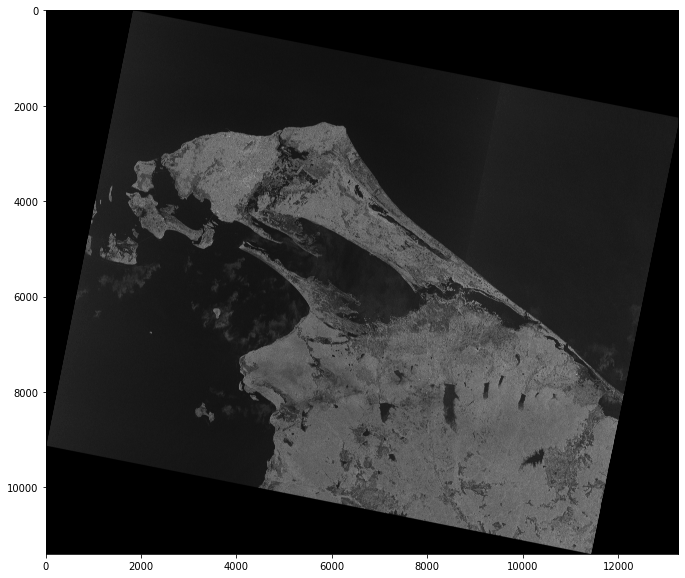

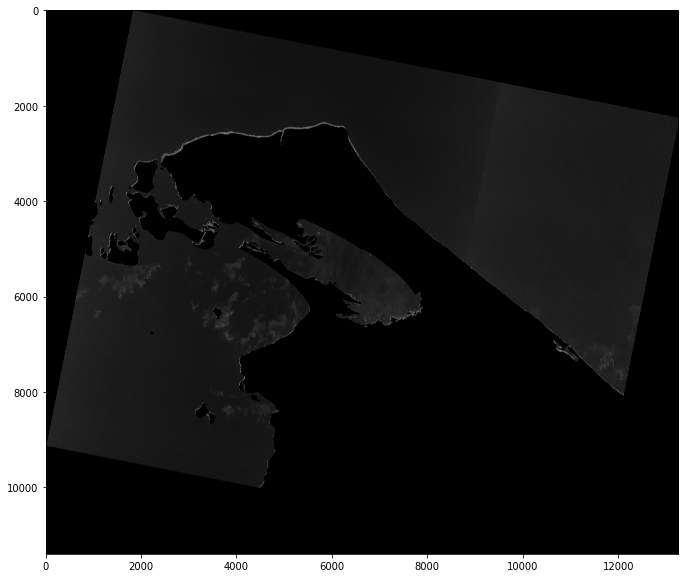

In [48]:
root = tk.Tk()
app = FullScreenApp(root)
root.title("Land Masking")
#photo = tk.PhotoImage(file='bandVisulizationAmplitude_VH.png')

button = tk.Button(root, text="Open Image")
button.bind("<Button-1>", open_file)
button.pack(side='top')

button = tk.Button(root, text="Land Mask")
button.bind("<Button-1>", land_mask)
button.pack(side='bottom')


root.mainloop()

In [15]:
#pp.bandVisulization(prod,pp.bands(prod)[0])